#Assignment 1: Non-linear analysis
By: César Portocarrero

Student Number: 37215134

##1) Installation of necessary modules and packages


In [ ]:
######################################################################################
# This is a simple sample code to introduce necessary grammar in developing codes for
# your assignment on arc-length method.
# This simple script do forward Euler method to trace the non-linear F-u relation, with
# load control
# In this sample code, I am using sympy package of Python to manipulate equations
# with symbolic algebra. Sympy could be a useful tool.
#######################################################################################
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
###############are 
# load package for symbolic algebra
# see http://docs.sympy.org/0.7.2/tutorial.html, if you want to learn more on sympy
import sympy as sym
#For pretty printing of symbolic expressions
from fractions import Fraction
from sympy import init_printing
#init_printing(use_latex=True)
init_printing(use_latex='mathjax')
from sympy import pprint
from sympy import Symbol
from IPython.display import display


############
#for numerical computing we use numpy ; arrays, etc.
import numpy as np
import math
#for plotting
import matplotlib.pyplot as plt
###########

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

##2) Definition of u, Fbar, Kt and evaluation function 

In [ ]:
#########################################################
#Define variables
u, kbar, Kt =sym.symbols('u kbar K_t')

Fbar = u + Fraction(3/2)*u**2 + Fraction(1/2)*u**3 + kbar*u

Kt = sym.diff(Fbar, u)

#display the equation of Fbar
display(Fbar)
display(Kt)


###############
# A small function to evaluate the numeric value of a given sympy function (e.g. Kt or Fbar) at given values of kbar and u.
# When the f = Fbar, this evaluates the numeric value of Fbar at kbar=k and u=U
###############
def Eval_at(f, k, U):
    return f.evalf(subs={u : U, kbar : k } )

## example of how to use the above function to evaluate Kt or Fbar at kbar=0 and u=1
val = Eval_at(Kt, 0, 1)
print("Kt at the given point =", val)

val = Eval_at(Fbar, 0, 1)
print("Fbar at the given point =", val)
####

       3      2    
      u    3⋅u     
k̅⋅u + ── + ──── + u
      2     2      

       2          
    3⋅u           
k̅ + ──── + 3⋅u + 1
     2            

Kt at the given point = 5.50000000000000
Fbar at the given point = 3.00000000000000


##3) Forward-Euler Implementation

###3.1) General definition

In [ ]:
######################################
# set necessary variables for Forward Euler iterations
######################################
kbar_val = 0.8     # value for kbar
df = -0.05       # load increment at a given iteration
Fmax = -2        #maximum desired value of Fbar
num_iterations = math.ceil(Fmax/df) # maximum number of Forward Euler steps


##two arrays to store force and displacement at each iteration
Fi_FE = np.zeros(num_iterations)
ui_FE = np.zeros(num_iterations)

#######################################
# do the forward Euler iterations
#######################################
for i in range(1, num_iterations):
    Kti = Eval_at(Kt, kbar_val, ui_FE[i-1])    # Kt at u[i-1]
    dui = df/Kti

    ui_FE[i] = ui_FE[i-1] + dui
    Fi_FE[i] = Fi_FE[i-1] + df
########################################


###3.2) Function implementation

In [ ]:
def ForwardEuler(kbar_val):
  df = -0.05
  Fmax = -2
  num_iterations = math.ceil(Fmax/df)
  Fi = np.zeros(num_iterations)
  ui = np.zeros(num_iterations)
  for i in range(1, num_iterations):
    Kti = Eval_at(Kt, kbar_val, ui[i-1])    # Kt at u[i-1]
    dui = df/Kti

    ui[i] = ui[i-1] + dui
    Fi[i] = Fi[i-1] + df
  return(ui, Fi)

##4) Newton-Raphson method implementation

###4.1) General definition

In [ ]:
######################################
# set necessary variables for Newton-Raphson iterations
######################################
kbar_val = 0.8     # value for kbar
df = -0.05       # load increment at a given iteration
Fmax = -2        #maximum desired value of Fbar
num_iterations = math.ceil(Fmax/df) # maximum number of Newton-Raphson steps
tolerance=0.0001

##two arrays to store force and displacement at each iteration
Fi_NR = np.zeros(num_iterations)
ui_NR = np.zeros(num_iterations)

#######################################
# do the Newton-Raphson iterations
#######################################

for i in range(1, num_iterations):
    #DeltaU is set to 0 at the beginning of the iteration
    dui=0
    #The internal force is evaluated
    Fint=Eval_at(Fbar, kbar_val, ui_NR[i-1])
    #The external force is calculated by adding the load increment
    Fext=Fi_NR[i-1]+df
    #The initial residual is calculated
    r=df
    #The tangent stiffness is calculated at the current step of the iteration
    Kti = Eval_at(Kt, kbar_val, ui_NR[i-1]) 
    #Convergence loop is inititated, will continue looping until the residual is less than the established tolerance value of 0.0001
    while abs(r) > tolerance:
      #Calculation of sigma_u as the quotient between the residual and the tangent stiffness
      sigma_u_i=r/Kti
      #Delta u is updated by adding sigma_u
      dui+=sigma_u_i
      #Once again the internal force is calculated at the new u value
      Fint=Eval_at(Fbar, kbar_val, ui_NR[i-1]+dui)
      #The residual is updated
      r=Fext-Fint
      #Finally the tangent stiffness is updated
      Kti = Eval_at(Kt, kbar_val, ui_NR[i-1]+dui)
    ui_NR[i] = ui_NR[i-1] + dui
    Fi_NR[i] = Fi_NR[i-1] + df
########################################


###3.2) Function implementation

In [ ]:
def NewtonRaphson(kbar_val):
  df = -0.05
  Fmax = -2
  num_iterations = math.ceil(Fmax/df)
  tolerance=0.0001
  ui_NR = np.zeros(num_iterations)
  Fi_NR = np.zeros(num_iterations)
  for i in range(1, num_iterations):
    #DeltaU is set to 0 at the beginning of the iteration
    dui=0
    #The internal force is evaluated
    Fint=Eval_at(Fbar, kbar_val, ui_NR[i-1])
    #The external force is calculated by adding the load increment
    Fext=Fi_NR[i-1]+df
    #The initial residual is calculated
    r=df
    #The tangent stiffness is calculated at the current step of the iteration
    Kti = Eval_at(Kt, kbar_val, ui_NR[i-1]) 
    #Convergence loop is inititated, will continue looping until the residual is less than the established tolerance value of 0.0001
    while abs(r) > tolerance:
      #Calculation of delta_u as the quotient between the residual and the tangent stiffness
      delta_u_i=r/Kti
      #Delta u is updated by adding delta_u
      dui+=delta_u_i
      #Once again the internal force is calculated at the new u value
      Fint=Eval_at(Fbar, kbar_val, ui_NR[i-1]+dui)
      #The residual is updated
      r=Fext-Fint
      #Finally the tangent stiffness is updated
      Kti = Eval_at(Kt, kbar_val, ui_NR[i-1]+dui)
    ui_NR[i] = ui_NR[i-1] + dui
    Fi_NR[i] = Fi_NR[i-1] + df
  return(ui_NR, Fi_NR)

##5) Arc-length method (Crisfield implementation)

###5.1) General definition

In [ ]:
######################################
# set necessary variables for Arc-length method
######################################
kbar_val = 0.8     # value for kbar
df = -0.05       # load increment at a given iteration
Fmax = -2        #maximum desired value of Fbar
num_iterations = math.ceil(Fmax/df) # maximum number of Newton-Raphson steps
tol =0.0001 #Convergence criteria
beta=1 #Beta value
dl=0.01 #DeltaL value
##three arrays to store force, displacement and lambda at each iteration
Fi_AL = np.zeros(num_iterations)
ui_AL = np.zeros(num_iterations)
lambda_AL = np.zeros(num_iterations)
#######################################
# do the Arc-length iterations
#######################################
lam=1.0 #Initial lambda value
fhat=df #fhat set to df value
error=1 #Initial error set to 1

for i in range(1, num_iterations):
  #Define DeltaLambda
  Dlam=1
  #Ui is set as the u value from the previous step
  ui=ui_AL[i-1]
  if i==1:
    #Evaluation of tangent stiffness at initial conditions
    Kti=Eval_at(Kt, kbar_val, ui) 
    #delta_u_1 is calculated
    delta_u_1=lam*fhat/Kti
  else:
    #delta_u_1 is set as the previous value of Du (last iteration)
    delta_u_1=Duprev
    #Lambda value is updated by adding the new Dlambda value
    lam+=Dlam
  #Ui is updated by adding the delta_u_1 value 
  ui+=delta_u_1
  #Delta_u for this iteration is updated to the delta_u_1 value
  Du=delta_u_1
  #The internal force is calculated at the current step
  fint=Eval_at(Fbar, kbar_val, ui)
  #Evaluation of tangent stiffness at current step
  Kti=Eval_at(Kt, kbar_val, ui) 
  #Residual calculation
  res=lam*fhat-fint
  #Convergence loop is inititated, will continue looping until the residual is less than the established tolerance value of 0.0001
  while error>tol:
    #Calculation of delta_u_1
    delta_u_1=fhat/Kti
    #Calculation of delta_u_2
    delta_u_2=res/Kti
    #delta_lambda is calculated using the normal path method 
    delta_lambda=-(Du*delta_u_2)/(Du*delta_u_1+beta*beta*Dlam*fhat*fhat)
    #delta_u is computed with the new values of delta_lambda, delta_u_1 and delta_u_2
    delta_u=delta_lambda*delta_u_1+delta_u_2
    #Delta Lambda and Lambda are updated
    Dlam+=delta_lambda
    lam+=delta_lambda
    #Delta u and Ui are updated
    Du+=delta_u
    ui+=delta_u
    #Internal force is reevaluated at new Ui value
    fint=Eval_at(Fbar, kbar_val, ui)
    #Tangent stiffness is reevaluated at new Ui value
    Kti=Eval_at(Kt, kbar_val, ui) 
    #Residual is calculated
    res=lam*fhat-fint
    #The error is defined as the absolute value of the residual
    error=abs(res)
  #Delta u from this iteration is stored as variable "Duprev"
  Duprev=Du
  #Final values for u and F in this interation are stored
  ui_AL[i] = ui
  Fi_AL[i] = lam*fhat

###5.2) Function implementation

In [ ]:
def ArcLength(kbar_val):
  df = -0.05       # load increment at a given iteration
  Fmax = -2        #maximum desired value of Fbar
  num_iterations = math.ceil(Fmax/df) # maximum number of Newton-Raphson steps
  tol =0.0001 #Convergence criteria
  beta=1 #Beta value
  dl=0.01 #DeltaL value
  ##three arrays to store force, displacement and lambda at each iteration
  Fi_AL = np.zeros(num_iterations)
  ui_AL = np.zeros(num_iterations)
  lambda_AL = np.zeros(num_iterations)

  lam=1.0 #Initial lambda value
  fhat=df #fhat set to df value

  for i in range(1, num_iterations):
    #Define DeltaLambda
    Dlam=1
    #Ui is set as the u value from the previous step
    ui=ui_AL[i-1]
    if i==1:
      #Evaluation of tangent stiffness at initial conditions
      Kti=Eval_at(Kt, kbar_val, ui) 
      #delta_u_1 is calculated
      delta_u_1=lam*fhat/Kti
    else:
      #delta_u_1 is set as the previous value of Du (last iteration)
      delta_u_1=Duprev
      #Lambda value is updated by adding the new Dlambda value
      lam+=Dlam
    #Ui is updated by adding the delta_u_1 value 
    ui+=delta_u_1
    #Delta_u for this iteration is updated to the delta_u_1 value
    Du=delta_u_1
    #The internal force is calculated at the current step
    fint=Eval_at(Fbar, kbar_val, ui)
    #Evaluation of tangent stiffness at current step
    Kti=Eval_at(Kt, kbar_val, ui) 
    #Residual calculation
    res=lam*fhat-fint
    error=abs(res)
    #Convergence loop is inititated, will continue looping until the residual is less than the established tolerance value of 0.0001
    while error>tol:
      #Calculation of delta_u_1
      delta_u_1=fhat/Kti
      #Calculation of delta_u_2
      delta_u_2=res/Kti
      #delta_lambda is calculated using the normal path method 
      delta_lambda=-(Du*delta_u_2)/(Du*delta_u_1+beta*beta*Dlam*fhat*fhat)
      #delta_u is computed with the new values of delta_lambda, delta_u_1 and delta_u_2
      delta_u=delta_lambda*delta_u_1+delta_u_2
      #Delta Lambda and Lambda are updated
      Dlam+=delta_lambda
      lam+=delta_lambda
      #Delta u and Ui are updated
      Du+=delta_u
      ui+=delta_u
      #Internal force is reevaluated at new Ui value
      fint=Eval_at(Fbar, kbar_val, ui)
      #Tangent stiffness is reevaluated at new Ui value
      Kti=Eval_at(Kt, kbar_val, ui) 
      #Residual is calculated
      res=lam*fhat-fint
      #The error is defined as the absolute value of the residual
      error=abs(res)
    #Delta u from this iteration is stored as variable "Duprev"
    Duprev=Du
    #Final values for u and F in this interation are stored
    ui_AL[i] = ui
    Fi_AL[i] = lam*fhat
  return(ui_AL,Fi_AL)

##6) Plotting function

In [ ]:
#######################################################################
# Now we plot out results and analytical solution
#######################################################################

def plotResults(kbar_val):
  #####################################################
  # The following two lines are only for using pretty fonts in figures.
  # Comment those, if you face any difficulties
  ####################################################
  plt.rc('text', usetex=True)
  plt.rc('font', family='serif')
  #####################################################

  ############################################
  fig,axs = plt.subplots(sharex=False,figsize=(10,8))
  # ##########################################

  axs.scatter(ForwardEuler(kbar_val)[0], ForwardEuler(kbar_val)[1], label="Forward Euler solution")
  axs.scatter(NewtonRaphson(kbar_val)[0], NewtonRaphson(kbar_val)[1], label="Newton Raphson solution")
  axs.scatter(ArcLength(kbar_val)[0], ArcLength(kbar_val)[1], label="Arc-length solution")
  ##############################################################
  # To plot the analytical relation between Fbar and u
  ##############################################################
  ui_analytic = np.linspace(0, -2, 100)
  Fi_analytic = np.zeros(len(ui_analytic))
  for i in range(len(ui_analytic)):
      Fi_analytic[i] = Eval_at(Fbar, kbar_val, ui_analytic[i])

  axs.plot(ui_analytic, Fi_analytic, color='black', linewidth=1, label="Analytical solution "+r"$\frac{u^3}{2}+\frac{3u^2}{2}+$"+str(kbar_val+1)+r"$u$")
  ###############################################################

  ###############################################################
  # axes titles, font size, etc. of the plot
  ###############################################################
  axs.set_xlabel(r"$u$", size=24)
  axs.set_ylabel(r"$\bar{F}$", size=24)
  axs.xaxis.set_tick_params(labelsize=20)
  axs.yaxis.set_tick_params(labelsize=20)
  axs.legend(fontsize=20, frameon=False)
  #########################

  plt.show()

## 7) Results

### 7.1) For *k_bar*=1

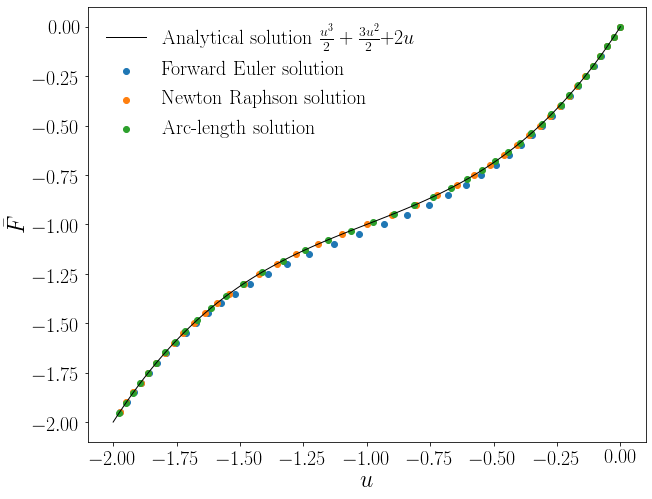

In [ ]:
plotResults(1)

### 7.1) For *k_bar*=0.5

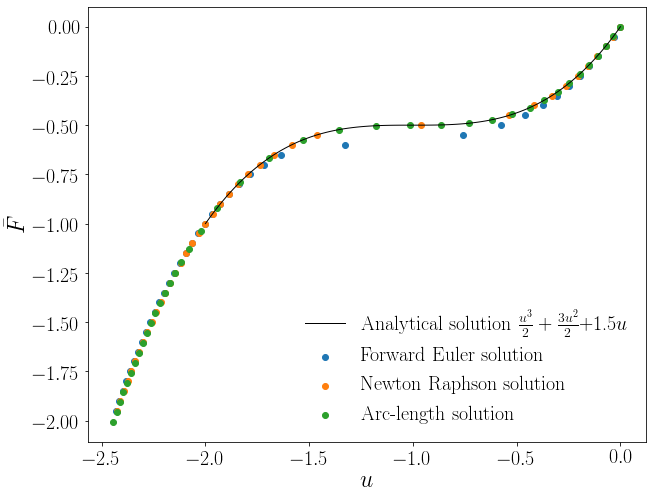

In [ ]:
plotResults(0.5)

### 7.1) For *k_bar*=0.1

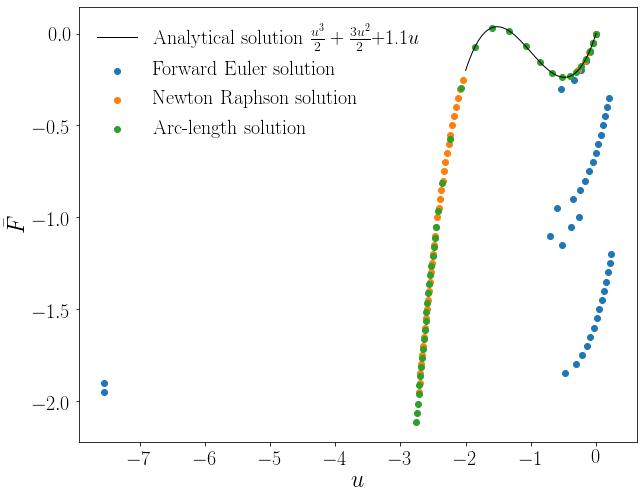

In [ ]:
plotResults(0.1)